In [23]:
import numpy as np
import pandas as pd
import open3d as o3d
import pymeshlab as pyml
import time 
import os
import trimesh


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# import pclpy
# from pclpy import pcl
# from plyfile import PlyData, PlyElement

In [2]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_colwidth", 256)

In [19]:
%matplotlib inline
sns.set(rc={'figure.figsize':(18,6)})


In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
os.chdir("D:\\Workspace\\Python\\Thesis Data\\")

In [6]:
INPUT_PATH = os.getcwd()+'\\Save data\\Processed_data'
OUTPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'

INPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'
OUTPUT_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output'
OUTPUT_PCA_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output\\PCA'

In [7]:
patient_id_list = '2_BC	3_BC	4_BC	5_BM	6_BM	7_BP	8_BP	9_KBW	10_SUM	11_DHM	12_GAW	13_PMM	14_TR	15_TR	16_TR	18_EM	19_EM	20_EM	21_FA	22_FA	23_HJ	24_HJ	25_HM	26_HM	27_HM	28_JM	29_JM	30_JM	31_JM	32_JM	33_KBB	34_KBB	35_KBB	36_KBB	37_KBB	38_KBB	39_KBB	40_KBB	41_KBB	42_KBB	43_KBB	44_AC	45_AC	46_LE	47_LE	48_LE	49_LE	50_LE	51_LE	52_LE	53_LS	54_MR	55_MR	56_WA	57_SF	58_SI	59_SI	1_AK	60_BL	61_BN	62_CA	63_CA	64_CA	65_FU	66_GI	67_HC	68_HD	69_HI	70_HI	71_HRA	72_HRA	73_HS	74_HS	75_IS	76_JM	77_KA	78_KB	79_KBB	80_KBB	81_KBB	82_KBB	83_KBB	84_KE	85_KG	86_KI	87_KJ	88_KR	89_LE	90_BMW	91_LS	92_MAS	93_MAS	94_MAS	95_MAS	96_MAS	97_MD	98_MJ	99_MM	100_MR	101_MR	102_OC	103_PA	104_PH	105_RS	106_RU	107_SA	108_SB	109_SG	110_SK	111_SK	112_SM	113_SN	114_SR	115_SR	116_SR	117_TI	118_TI	119_TI	120_TM	121_TR	122_TR	123_TR	124_VA	125_VT	126_WD	127_WW	128_WW	129_ZK	130_ZK	131_ZK'
patient_id_list = patient_id_list.split()
patient_id_list[:5]

['2_BC', '3_BC', '4_BC', '5_BM', '6_BM']

In [8]:
ORIGINAL_FILENAME = "_PLY0.ply"
WSS_FILENAME = "_WSS.csv"
WSS_DOWN_FILENME = "_WSS_down.csv"
CURV_FILENAME = "_curv_down.csv"

PYMESH_FILENAME = "_pymesh.ply"
DESC_1_FILENAME = "_fpfh.ply"
DESC_2_FILENAME = "_shot.ply"

RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6

OUTPUT_FILENAME = "_output.ply"
PCA_FILENAME = "_pca.ply"
os.path.join(OUTPUT_TEMP_PATH,f"{'3_BC'}{PCA_FILENAME}")

'D:\\Workspace\\Python\\Thesis Data\\Save data\\Processed_data\\Output_temp\\3_BC_pca.ply'

In [9]:
print (f"TOTAL FILES: {len(patient_id_list)}")

TOTAL FILES: 130


In [31]:
patient_id_list_new = ['102_OC', '27_HM', '113_SN','101_MR','48_LE','4_BC',
         '91_LS', '32_JM',  '67_HC','130_ZK', '55_MR','97_MD', 
         '122_TR', '124_VA', '120_TM', '31_JM','109_SG','89_LE', 
         '75_IS', '69_HI', '78_KB','73_HS', '126_WD','80_KBB','35_KBB', '30_JM',
         '26_HM', '118_TI','105_RS','15_TR','93_MAS',
         '106_RU', '123_TR', '16_TR', '61_BN', '50_LE','68_HD',
         '110_SK','111_SK','86_KI', '108_SB', '2_BC', '3_BC', '10_SUM', 
         '42_KBB','114_SR', '115_SR','41_KBB','76_JM','13_PMM','14_TR','40_KBB',
         '54_MR', '12_GAW', '9_KBW','99_MM','92_MAS', '46_LE','37_KBB','119_TI',
         '65_FU', '22_FA',  '21_FA','57_SF','88_KR','90_BMW', '34_KBB',
         '60_BL','81_KBB','58_SI','77_KA','83_KBB', '51_LE','74_HS','1_AK', '8_BP',
          '95_MAS','79_KBB',  '38_KBB','94_MAS', '98_MJ',
          '36_KBB','39_KBB', '104_PH', '43_KBB', 
          '121_TR', '6_BM',
          '28_JM','62_CA','96_MAS', '52_LE', '100_MR', '44_AC', '63_CA',  
         '29_JM', 
         '18_EM','33_KBB','71_HRA', '11_DHM','107_SA', '45_AC', '129_ZK'
          ]
len(patient_id_list_new)

102

# 1. Radius 

## 1.1 Check Radius for downsampled files

In [34]:
# del(radius_df)
radius_columns = ['original_points','sampled_points','NND_mean','NND_median','NND_std','NND_min','NND_max',]
radius_df = pd.DataFrame(index=patient_id_list, columns = radius_columns )
radius_df.head(2)

,original_points,sampled_points,NND_mean,NND_median,NND_std,NND_min,NND_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for PATIENT_ID in patient_id_list_new:
# for PATIENT_ID in patient_id_list:


    #LOAD Point Cloud in o3d instance
    pc_original = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Compute nearest distance
    NN_dist = pc_o3d.compute_nearest_neighbor_distance()
    
    radius_df.loc[PATIENT_ID] = [len(np.asarray(pc_original.points)),len(np.asarray(pc_o3d.points)), 
                          np.mean(NN_dist), np.median(NN_dist), np.std(NN_dist), np.min(NN_dist), np.max(NN_dist)
                         ]

# df = df.astype(float)
radius_df = radius_df.infer_objects()
# pd.to_numeric(df, downcast='float')
radius_df.head(5)

,original_points,sampled_points,NND_mean,NND_median,NND_std,NND_min,NND_max
2_BC,77127.0,15307.0,0.000114,0.000114,0.000027,0.000012,0.000233
3_BC,28274.0,15271.0,0.000119,0.000118,0.000026,0.000027,0.000291
4_BC,22604.0,15223.0,0.000109,0.000104,0.000020,0.000026,0.000211
5_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_BM,20744.0,15154.0,0.000087,0.000084,0.000018,0.000032,0.000176


In [13]:
radius_df

,original_points,sampled_points,NND_mean,NND_median,NND_std,NND_min,NND_max
2_BC,77127,15307,0.000114,0.000114,0.000027,0.000012,0.000233
3_BC,28274,15271,0.000119,0.000118,0.000026,0.000027,0.000291
4_BC,22604,15223,0.000109,0.000104,0.000020,0.000026,0.000211
5_BM,95358,15366,0.000175,0.000171,0.000056,0.000031,0.000455
6_BM,20744,15154,0.000087,0.000084,0.000018,0.000032,0.000176
7_BP,68120,15286,0.000076,0.000075,0.000021,0.000011,0.000184
8_BP,88042,15376,0.000087,0.000087,0.000023,0.000022,0.000202
9_KBW,79622,15393,0.000102,0.000101,0.000028,0.000023,0.000250
10_SUM,70856,15155,0.000099,0.000097,0.000025,0.000022,0.000284
11_DHM,76754,15304,0.000102,0.000101,0.000027,0.000027,0.000235


In [37]:
radius_df.describe(percentiles = np.arange(0,1.1,0.1))

,original_points,sampled_points,NND_mean,NND_median,NND_std,NND_min,NND_max
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,65755.813725,15310.362745,0.000094,0.000093,0.000025,0.000020,0.000223
std,19106.456317,94.350494,0.000015,0.000014,0.000004,0.000007,0.000041
min,20744.000000,15112.000000,0.000063,0.000062,0.000017,0.000006,0.000134
0%,20744.000000,15112.000000,0.000063,0.000062,0.000017,0.000006,0.000134
10%,42074.500000,15176.800000,0.000077,0.000076,0.000019,0.000011,0.000176
20%,49652.200000,15236.400000,0.000080,0.000080,0.000021,0.000014,0.000189
30%,56400.600000,15268.900000,0.000085,0.000084,0.000022,0.000015,0.000201
40%,61870.600000,15289.400000,0.000088,0.000087,0.000023,0.000017,0.000206
50%,65283.500000,15309.000000,0.000091,0.000091,0.000024,0.000020,0.000211


In [29]:
radius_df.iloc[:,2:].describe(percentiles = [0,0.05,0.25,0.5,0.75,0.85,0.9,0.95,1])

,NND_mean,NND_median,NND_std,NND_min,NND_max
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.000095,0.000094,0.000025,0.000020,0.000227
std,0.000021,0.000021,0.000006,0.000008,0.000061
min,0.000055,0.000054,0.000013,0.000006,0.000134
0%,0.000055,0.000054,0.000013,0.000006,0.000134
5%,0.000068,0.000068,0.000018,0.000009,0.000159
25%,0.000081,0.000081,0.000022,0.000015,0.000189
50%,0.000091,0.000090,0.000024,0.000020,0.000211
75%,0.000103,0.000102,0.000028,0.000025,0.000250
85%,0.000113,0.000112,0.000030,0.000027,0.000270


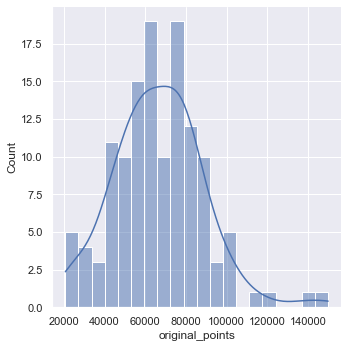

In [22]:
sns.displot(radius_df, bins =20, x = "original_points", kde=True )

In [99]:
radius_df.describe().radius_max["50%"]

0.00022438510036434266

In [100]:
radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]

'5_BM'

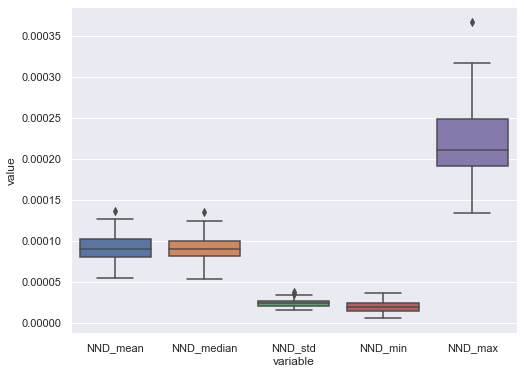

In [26]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,2:]))

plt.show()

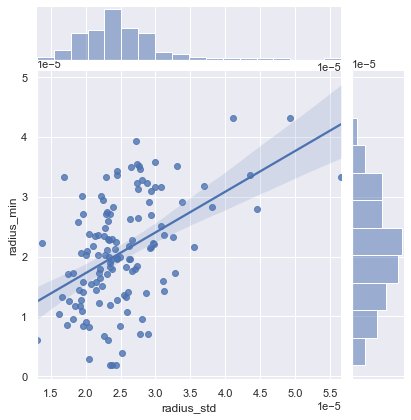

In [102]:
sns.jointplot(x='radius_std',y='radius_min',data=radius_df,kind='reg')


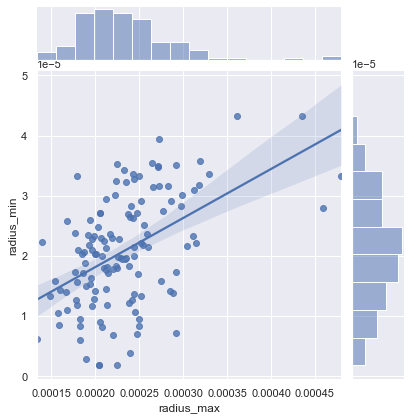

In [103]:
sns.jointplot(x='radius_max',y='radius_min',data=radius_df,kind='reg')


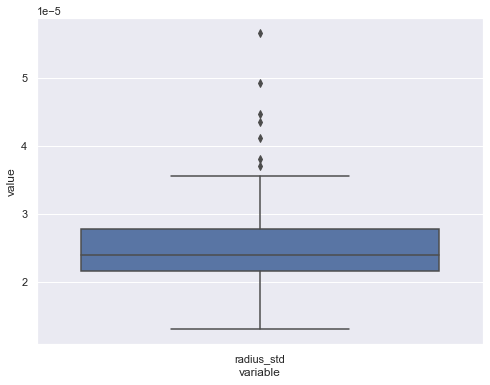

In [106]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,4:5]))

plt.show()

<AxesSubplot:xlabel='radius_std', ylabel='Density'>

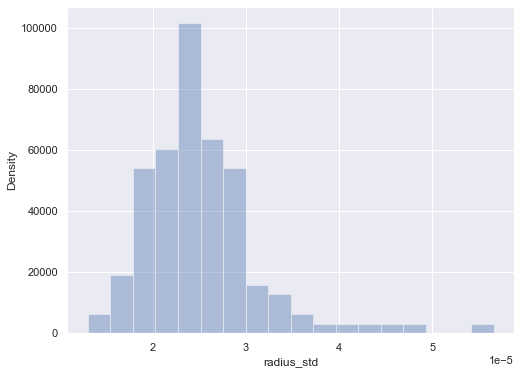

In [107]:
sns.distplot(radius_df['radius_std'])

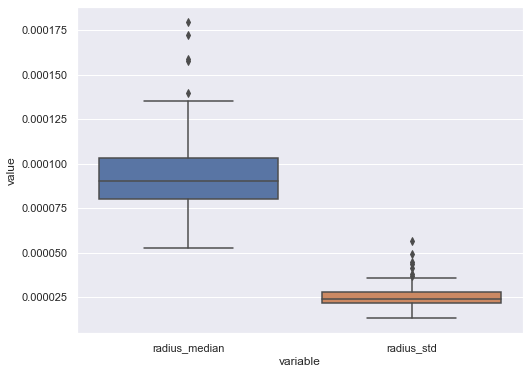

In [109]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,3:5]))

plt.show()

In [111]:
radius_df.query("radius_std >0.000036").index.values

array(['5_BM', '81_KBB', '84_KE', '103_PA', '116_SR', '127_WW', '129_ZK'],
      dtype=object)

In [112]:
radius_df.query("radius_median > 0.000135").index.values

array(['5_BM', '20_EM', '84_KE', '103_PA', '116_SR', '127_WW'],
      dtype=object)

In [113]:
radius_df.query("radius_std >0.000036 and radius_median > 0.000135").index.values

array(['5_BM', '84_KE', '103_PA', '116_SR', '127_WW'], dtype=object)

In [114]:
radius_df.query("radius_std >0.000036 or radius_median > 0.000135").index.values

array(['5_BM', '20_EM', '81_KBB', '84_KE', '103_PA', '116_SR', '127_WW',
       '129_ZK'], dtype=object)

<AxesSubplot:ylabel='Density'>

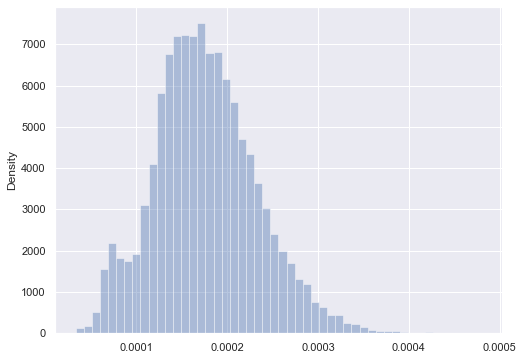

In [120]:
PATIENT_ID = '5_BM'
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

#Compute nearest distance
NN_dist = pc_o3d.compute_nearest_neighbor_distance()
sns.distplot(NN_dist)

<AxesSubplot:ylabel='Density'>

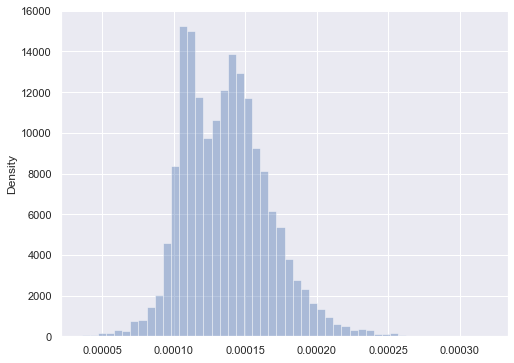

In [121]:
PATIENT_ID = '20_EM'
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

#Compute nearest distance
NN_dist = pc_o3d.compute_nearest_neighbor_distance()
sns.distplot(NN_dist)

In [122]:
radius_df.query("radius_std <0.000015").index.values

array(['128_WW', '131_ZK'], dtype=object)

<AxesSubplot:ylabel='Density'>

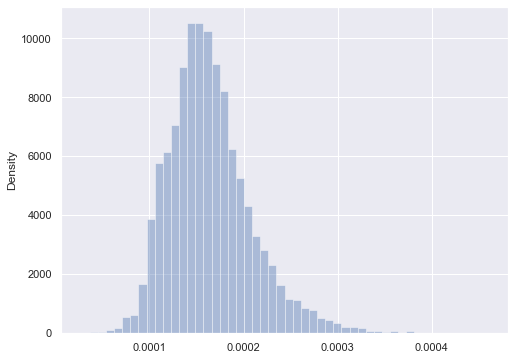

In [125]:
PATIENT_ID = '116_SR'
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

#Compute nearest distance
NN_dist = pc_o3d.compute_nearest_neighbor_distance()
sns.distplot(NN_dist)

## 1.2 Check Radius for original files

In [126]:
del(radius_df)
radius_columns = ['original_points','sampled_points','radius_mean','radius_median','radius_std','radius_min','radius_max',]
radius_df = pd.DataFrame(index=patient_id_list, columns = radius_columns )
radius_df.head(2)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
for PATIENT_ID in patient_id_list:

    #LOAD Point Cloud in o3d instance
    pc_original = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Compute nearest distance
    NN_dist = pc_original.compute_nearest_neighbor_distance()
    
    radius_df.loc[PATIENT_ID] = [len(np.asarray(pc_original.points)),len(np.asarray(pc_o3d.points)), 
                          np.mean(NN_dist), np.median(NN_dist), np.std(NN_dist), np.min(NN_dist), np.max(NN_dist)
                         ]

# df = df.astype(float)
radius_df = radius_df.infer_objects()
# pd.to_numeric(df, downcast='float')
radius_df.head(5)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,77127,15307,0.000051,0.000047,0.000023,0.000002,0.000116
3_BC,28274,15271,0.000095,0.000096,0.000010,0.000003,0.000122
4_BC,22604,15223,0.000096,0.000097,0.000008,0.000024,0.000120
5_BM,95358,15366,0.000073,0.000073,0.000008,0.000011,0.000110
6_BM,20744,15154,0.000073,0.000073,0.000008,0.000031,0.000104


In [128]:
radius_df

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
2_BC,77127,15307,0.000051,0.000047,0.000023,2.260904e-06,0.000116
3_BC,28274,15271,0.000095,0.000096,0.000010,3.497335e-06,0.000122
4_BC,22604,15223,0.000096,0.000097,0.000008,2.404581e-05,0.000120
5_BM,95358,15366,0.000073,0.000073,0.000008,1.053154e-05,0.000110
6_BM,20744,15154,0.000073,0.000073,0.000008,3.087654e-05,0.000104
7_BP,68120,15286,0.000041,0.000041,0.000003,5.536483e-06,0.000055
8_BP,88042,15376,0.000041,0.000041,0.000003,4.050684e-06,0.000054
9_KBW,79622,15393,0.000045,0.000045,0.000004,2.672417e-05,0.000072
10_SUM,70856,15155,0.000046,0.000045,0.000005,3.162306e-05,0.000070
11_DHM,76754,15304,0.000045,0.000045,0.000004,3.135206e-05,0.000066


In [129]:
radius_df.describe(percentiles = np.arange(0,1.1,0.1))

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
count,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,66639.869231,15306.069231,0.000051,0.000051,0.000007,1.155818e-05,0.000074
std,22043.015602,94.365871,0.000016,0.000017,0.000005,1.158133e-05,0.000022
min,20744.000000,15112.000000,0.000027,0.000027,0.000002,7.195140e-07,0.000036
0%,20744.000000,15112.000000,0.000027,0.000027,0.000002,7.195140e-07,0.000036
10%,41880.600000,15174.900000,0.000039,0.000038,0.000003,1.767420e-06,0.000054
20%,48223.600000,15238.000000,0.000041,0.000041,0.000003,2.327126e-06,0.000055
30%,55788.300000,15265.700000,0.000044,0.000044,0.000004,2.920708e-06,0.000065
40%,60633.200000,15278.600000,0.000045,0.000045,0.000004,3.452121e-06,0.000067
50%,65068.500000,15301.000000,0.000048,0.000048,0.000004,5.180892e-06,0.000068


In [130]:
radius_df.describe().radius_max["50%"]

6.775342894729515e-05

In [75]:
radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]

'84_KE'

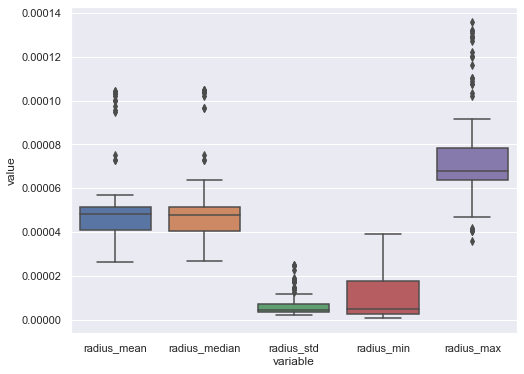

In [76]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,2:]))

plt.show()

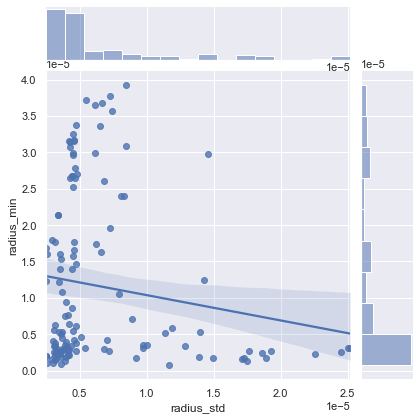

In [79]:
sns.jointplot(x='radius_std',y='radius_min',data=radius_df,kind='reg')


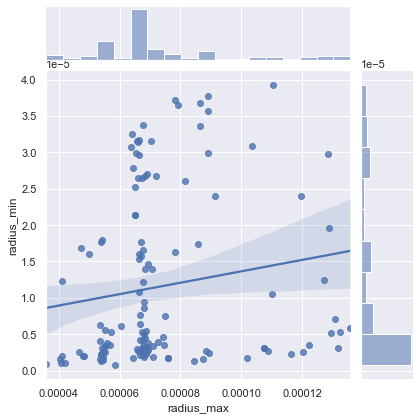

In [80]:
sns.jointplot(x='radius_max',y='radius_min',data=radius_df,kind='reg')


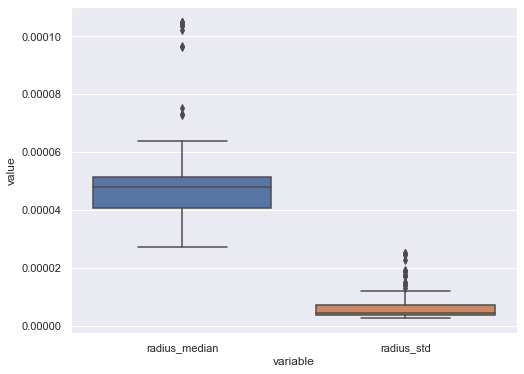

In [87]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,3:5]))

plt.show()

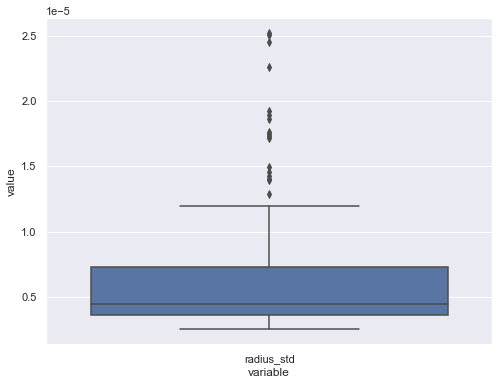

In [88]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,4:5]))

plt.show()

<AxesSubplot:xlabel='radius_std', ylabel='Density'>

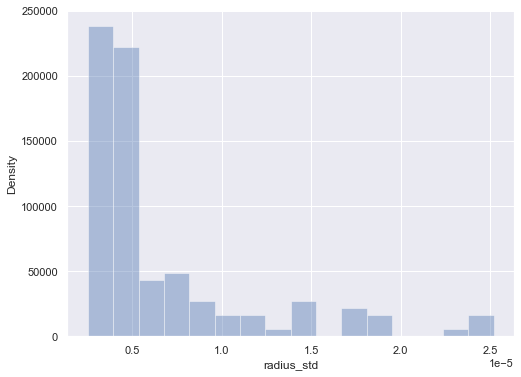

In [78]:
sns.distplot(radius_df['radius_std'])

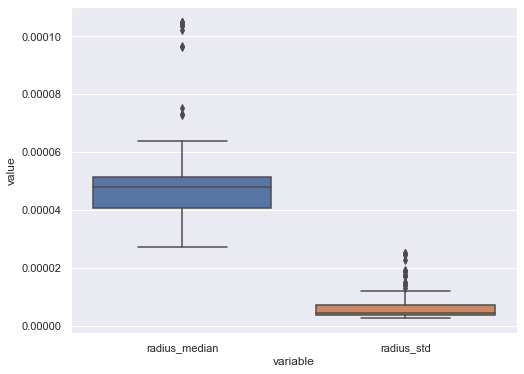

In [90]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,3:5]))

plt.show()

In [91]:
radius_df.query("radius_std >0.000014").index.values

array(['2_BC', '44_AC', '45_AC', '54_MR', '55_MR', '1_AK', '68_HD',
       '98_MJ', '100_MR', '101_MR', '117_TI', '118_TI', '130_ZK',
       '131_ZK'], dtype=object)

In [92]:
radius_df.query("radius_median > 0.000062").index.values

array(['3_BC', '4_BC', '5_BM', '6_BM', '20_EM', '40_KBB', '45_AC',
       '65_FU', '84_KE', '97_MD', '98_MJ', '103_PA', '116_SR', '117_TI',
       '118_TI'], dtype=object)

In [93]:
radius_df.query("radius_std >0.000014 and radius_median > 0.000062").index.values

array(['45_AC', '98_MJ', '117_TI', '118_TI'], dtype=object)

In [94]:
radius_df.query("radius_std >0.000014 or radius_median > 0.000062").index.values

array(['2_BC', '3_BC', '4_BC', '5_BM', '6_BM', '20_EM', '40_KBB', '44_AC',
       '45_AC', '54_MR', '55_MR', '1_AK', '65_FU', '68_HD', '84_KE',
       '97_MD', '98_MJ', '100_MR', '101_MR', '103_PA', '116_SR', '117_TI',
       '118_TI', '130_ZK', '131_ZK'], dtype=object)

### OBSERVATIONS
1. Min Radius should be similar across files, since we are interested in the highest WSS region
2. The variation of radiuses should not be much within files (radius_std). 
2.1. If there are files >Q5, then it means we have a lot of points which have higher radiuses i.e. less regions of WSS. 
2.2. If there are files <Q1, then it means we have a lot of points which have lower radiuses i.e. higher regions of WSS.
3. Radius impacts the influence area for calculating the Mean and Gaussian curvatures, local descriptors
3.1. Lower RADIUS_SEARCH can have a lot of missing values for lots of points 
3.2. Higher RADIUS_SEARCH can lead to normalisation of higher WSS points' features, i.e. curvature will take into points which are further away from the source. 

# 2. RADIUS SEARCH Selection

## 2.1 RADIUS_SEARCH Impact - Using nearest distance between points

### 2.1.1 Lowest Max distance dataset 

In [80]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmin(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 131_ZK


In [82]:
#LOAD Point Cloud in o3d instance
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

#Compute nearest distance
NN_dist = pc_o3d.compute_nearest_neighbor_distance()
pd.Series(NN_dist).describe()

count    15160.000000
mean         0.000064
std          0.000013
min          0.000006
25%          0.000056
50%          0.000063
75%          0.000072
max          0.000133
dtype: float64

In [83]:
np.argmin(np.array(NN_dist)), np.argmax(np.array(NN_dist))

(880, 9829)

In [84]:
np.array(NN_dist)[np.argmin(np.array(NN_dist))], np.array(NN_dist)[np.argmax(np.array(NN_dist))]

(6.114929842649587e-06, 0.0001333869351027178)

In [85]:
#Build tree
# RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
RADIUS_SEARCH = 0.00024
o3d_kdtree = o3d.geometry.KDTreeFlann(pc_o3d)
print(f"Current Search Radius = {RADIUS_SEARCH}")

# Radius search 
search_pt_min = pc_o3d.points[np.argmin(np.array(NN_dist))]
search_pt_max = pc_o3d.points[np.argmax(np.array(NN_dist))]

# search_pt = [ 0.02097408,  0.0077485 , -0.0230285 ]
[k_min, idx_min, _] = o3d_kdtree.search_radius_vector_3d(search_pt_min, RADIUS_SEARCH)
[k_max, idx_max, _] = o3d_kdtree.search_radius_vector_3d(search_pt_max, RADIUS_SEARCH)

print(f"\nTotal neighbourhood points for the point with: \nmin dist = {k_min} \nmax dist = {k_max}")

Current Search Radius = 0.00024

Total neighbourhood points for the point with: 
min dist = 38 
max dist = 15


### 2.1.2 Highest Max distance dataset 

In [86]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 5_BM


In [88]:
#LOAD Point Cloud in o3d instance
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

#Compute nearest distance
NN_dist = pc_o3d.compute_nearest_neighbor_distance()
pd.Series(NN_dist).describe()

count    15366.000000
mean         0.000176
std          0.000057
min          0.000033
25%          0.000138
50%          0.000173
75%          0.000211
max          0.000480
dtype: float64

In [89]:
np.argmin(np.array(NN_dist)), np.argmax(np.array(NN_dist))

(36, 14132)

In [90]:
np.array(NN_dist)[np.argmin(np.array(NN_dist))], np.array(NN_dist)[np.argmax(np.array(NN_dist))]

(3.331233136310011e-05, 0.0004797659755583053)

In [92]:
#Build tree
# RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
RADIUS_SEARCH = 0.00024

o3d_kdtree = o3d.geometry.KDTreeFlann(pc_o3d)
print(f"Current Search Radius = {RADIUS_SEARCH}")

# Radius search 
search_pt_min = pc_o3d.points[np.argmin(np.array(NN_dist))]
search_pt_max = pc_o3d.points[np.argmax(np.array(NN_dist))]

# search_pt = [ 0.02097408,  0.0077485 , -0.0230285 ]
[k_min, idx_min, _] = o3d_kdtree.search_radius_vector_3d(search_pt_min, RADIUS_SEARCH)
[k_max, idx_max, _] = o3d_kdtree.search_radius_vector_3d(search_pt_max, RADIUS_SEARCH)

print(f"\nTotal neighbourhood points for the point with: \nmin dist = {k_min} \nmax dist = {k_max}")

Current Search Radius = 0.00024

Total neighbourhood points for the point with: 
min dist = 20 
max dist = 1


## 2.2 Compute Gaussian & Mean curvature using Radius

### 2.2.1 Lowest Max distance dataset 

In [93]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmin(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 131_ZK


In [94]:
#Load Mesh in Trimesh object
tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

In [95]:
# tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_{PYMESH_FILENAME}"))

mean_curv = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH*0.8)


In [96]:
pd.Series(mean_curv*1000).describe()

count    15160.000000
mean         0.062536
std          0.045509
min         -0.206699
25%          0.037269
50%          0.057977
75%          0.083337
max          0.308372
dtype: float64

In [97]:
np.std(mean_curv)/np.mean(mean_curv)

0.7276968392610883

In [98]:
np.std(mean_curv)/(np.max(mean_curv)-np.min(mean_curv)) 

0.08835180377805825

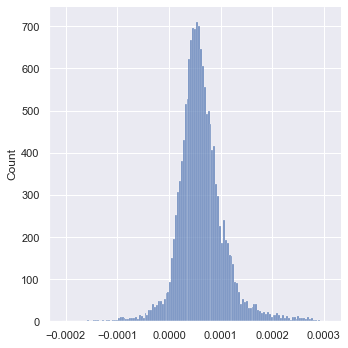

In [99]:
sns.displot(pd.Series(mean_curv))

### 2.2.2 Highest Max distance dataset 

In [100]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 5_BM


In [101]:
#Load Mesh in Trimesh object
tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

In [102]:
# tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_{PYMESH_FILENAME}"))

mean_curv = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH)


In [103]:
pd.Series(mean_curv*1000).describe()

count    15366.000000
mean         0.046385
std          0.076262
min         -0.548651
25%          0.016660
50%          0.045873
75%          0.081207
max          0.628486
dtype: float64

In [104]:
np.std(mean_curv)/np.mean(mean_curv)

1.644054544863426

In [105]:
np.std(mean_curv)/(np.max(mean_curv)-np.min(mean_curv)) 

0.06478399597606613

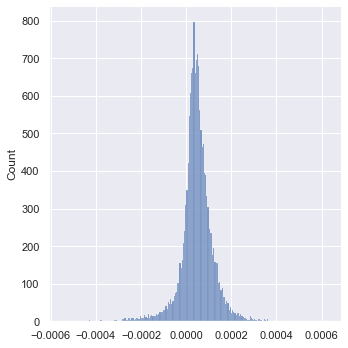

In [106]:
sns.displot(pd.Series(mean_curv))

## 2.3 Different RADIUS_SEARCH impact for a dataset

In [107]:
#Load Mesh in Trimesh object
P_ID = '2_BC'
tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

In [108]:
tr_mesh.vertices

TrackedArray([[ 0.04850944, -0.18175013, -0.1565741 ],
              [ 0.04326912, -0.18421611, -0.16014546],
              [ 0.0465792 , -0.18140906, -0.16208929],
              ...,
              [ 0.05830655, -0.17943369, -0.16513704],
              [ 0.05437695, -0.18918635, -0.16273384],
              [ 0.05373951, -0.18468481, -0.16402034]])

In [109]:
#Create a df with x,y,z points for storing curvature values

curv_df = pd.DataFrame(data =tr_mesh.vertices , columns = ["Points:0", "Points:1", "Points:2"])
curv_df.head(2)

,Points:0,Points:1,Points:2
0,0.048509,-0.181750,-0.156574
1,0.043269,-0.184216,-0.160145


##### Compute curvature using RADIUS_SEARCH as radius

#### Normalize Std by dividing with mean - CV
https://math.stackexchange.com/questions/260617/how-to-determine-if-standard-deviation-is-high-low

#### 

In [110]:
# tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_{PYMESH_FILENAME}"))

gaus_curv = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH)


In [111]:
gaus_curv2 = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH*0.5)


In [112]:
gaus_curv3 = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH*1.2)


In [113]:
gaus_curv4 = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                              radius =  RADIUS_SEARCH*1.5)


In [114]:
pd.Series(gaus_curv*1000).describe()

count    15307.000000
mean         0.061092
std          0.060550
min         -0.462044
25%          0.031862
50%          0.062075
75%          0.092560
max          0.424667
dtype: float64

In [115]:
 np.std(gaus_curv)/np.mean(gaus_curv),  np.std(gaus_curv2)/np.mean(gaus_curv2),  np.std(gaus_curv3)/np.mean(gaus_curv3),  np.std(gaus_curv4)/np.mean(gaus_curv4)


(0.9910996406548231, 1.1956664842152829, 0.952012093962864, 0.8994263926446384)

In [116]:
np.std(gaus_curv)/(np.max(gaus_curv)-np.min(gaus_curv)) 

0.06828403682932922

In [117]:
np.std(gaus_curv2)/(np.max(gaus_curv2)-np.min(gaus_curv2)), np.std(gaus_curv3)/(np.max(gaus_curv3) - np.min(gaus_curv3)) 

(0.0650039644351993, 0.07215432228032777)

In [118]:
np.std(gaus_curv4)/(np.max(gaus_curv4)-np.min(gaus_curv4)),

(0.07445495982615184,)

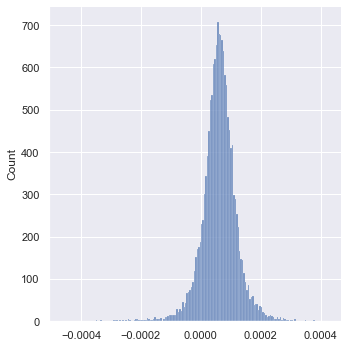

In [119]:
sns.displot(pd.Series(gaus_curv))

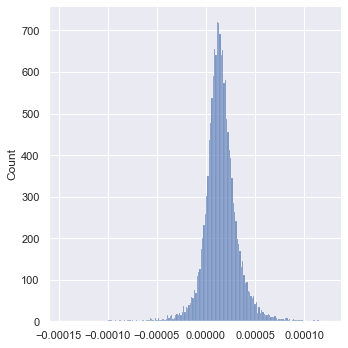

In [120]:
sns.displot(pd.Series(gaus_curv2))

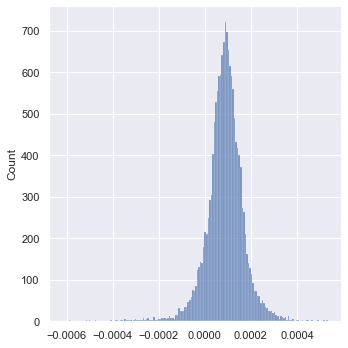

In [121]:
sns.displot(pd.Series(gaus_curv3))

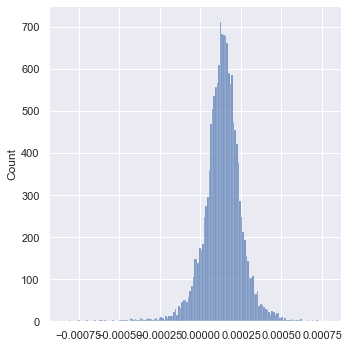

In [122]:
sns.displot(pd.Series(gaus_curv4))

# 3. WSS

## 3.1 WSS for original files

In [10]:
def scale_data(col: pd.Series,scaler) -> pd.Series:
    """
    Scale a column
    """
    X = col.values.reshape(-1, 1).copy()
    scaled_array = scaler.fit_transform(X)

    scaled_column = pd.Series(scaled_array.tolist()).explode()

    return scaled_column

In [142]:
wss_columns = ['original_points','sampled_points','wss_mean','wss_median','wss_std','wss_min','wss_max',]

wss_eda = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_eda_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

if not wss_eda.empty and wss_eda_scaled.empty :
    del(wss_eda)
    del(wss_eda_scaled)
    

wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
for PATIENT_ID in patient_id_list:
#     print(f"\nProcessing File at:")
#     print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df_wss["WSS_scaled"] = scale_data(df_wss["WSS"],min_max_scaler)
    
    
    wss_eda.loc[PATIENT_ID] = [df_wss.shape[0],np.nan, 
                               np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), 
                               np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
    wss_eda_scaled.loc[PATIENT_ID] = [df_wss.shape[0],np.nan, 
                                      np.mean(df_wss.WSS_scaled), np.median(df_wss.WSS_scaled), np.std(df_wss.WSS_scaled), 
                                      np.min(df_wss.WSS_scaled), np.max(df_wss.WSS_scaled)
                         ]
wss_eda = wss_eda.infer_objects()
wss_eda_scaled = wss_eda_scaled.infer_objects()

wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,NaN,2.664416,1.991029,2.601829,0.000063,21.984079
3_BC,28274,NaN,7.343544,7.063340,4.074379,0.073806,31.608334


In [144]:
wss_eda_scaled

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,NaN,0.121195,0.090564,0.118351,0.0,1.0
3_BC,28274,NaN,0.230533,0.221647,0.129204,0.0,1.0
4_BC,22604,NaN,0.297549,0.305800,0.117773,0.0,1.0
5_BM,95358,NaN,0.099091,0.055452,0.108242,0.0,1.0
6_BM,20744,NaN,0.178376,0.115479,0.167777,0.0,1.0
7_BP,68120,NaN,0.158992,0.144404,0.131318,0.0,1.0
8_BP,88042,NaN,0.116404,0.101354,0.093549,0.0,1.0
9_KBW,79622,NaN,0.241544,0.212946,0.143397,0.0,1.0
10_SUM,70856,NaN,0.165510,0.130494,0.137851,0.0,1.0
11_DHM,76754,NaN,0.088326,0.063121,0.080883,0.0,1.0


In [145]:
wss_eda

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,NaN,2.664416,1.991029,2.601829,6.307092e-05,21.984079
3_BC,28274,NaN,7.343544,7.063340,4.074379,7.380642e-02,31.608334
4_BC,22604,NaN,7.312326,7.512783,2.861085,8.391756e-02,24.377111
5_BM,95358,NaN,9.055627,5.069889,9.886064,5.298206e-03,91.338405
6_BM,20744,NaN,6.449848,4.178266,6.059387,7.636612e-03,36.123463
7_BP,68120,NaN,24.352395,22.118984,20.105235,1.029614e-02,153.113420
8_BP,88042,NaN,19.285902,16.796509,15.474012,3.138030e-02,165.442650
9_KBW,79622,NaN,4.818911,4.252105,2.842062,3.160806e-02,19.851186
10_SUM,70856,NaN,6.501759,5.127805,5.408897,7.576199e-03,39.244955
11_DHM,76754,NaN,4.651126,3.326295,4.251434,8.460045e-03,52.571410


In [147]:
wss_eda_scaled.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,130.000000,0.0,130.000000,130.000000,130.000000,130.0,1.300000e+02
mean,66639.869231,NaN,0.144640,0.117045,0.118055,0.0,1.000000e+00
std,22043.015602,NaN,0.059120,0.063323,0.035793,0.0,1.025207e-16
min,20744.000000,NaN,0.040254,0.010443,0.044653,0.0,1.000000e+00
50%,65068.500000,NaN,0.136707,0.109238,0.115235,0.0,1.000000e+00
55.6%,70595.000000,NaN,0.142342,0.115582,0.119605,0.0,1.000000e+00
61.1%,74080.000000,NaN,0.159028,0.126776,0.127451,0.0,1.000000e+00
66.7%,76040.000000,NaN,0.168336,0.141325,0.135424,0.0,1.000000e+00
72.2%,77868.333333,NaN,0.183311,0.154540,0.139115,0.0,1.000000e+00
77.8%,80976.000000,NaN,0.191249,0.164342,0.145420,0.0,1.000000e+00


In [146]:
wss_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,130.000000,0.0,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,66639.869231,NaN,15.011892,11.884706,13.103598,3.523739e-02,131.891500
std,22043.015602,NaN,15.748486,12.240603,16.995288,4.801506e-02,240.741628
min,20744.000000,NaN,2.319769,0.544347,1.971920,4.726365e-08,16.354270
50%,65068.500000,NaN,11.737498,8.890806,9.723227,1.556492e-02,78.809366
55.6%,70595.000000,NaN,12.602897,9.811380,10.141324,1.751969e-02,91.636461
61.1%,74080.000000,NaN,14.397594,11.242150,11.319728,2.394176e-02,98.525571
66.7%,76040.000000,NaN,15.313867,12.470666,12.113969,2.991460e-02,121.785370
72.2%,77868.333333,NaN,16.487332,12.972917,13.157530,3.309494e-02,138.672198
77.8%,80976.000000,NaN,17.406415,14.528185,15.671745,4.915100e-02,154.215413


In [139]:
wss_eda.query("wss_max >= 400").index.values

array(['49_LE', '53_LS'], dtype=object)

In [148]:
wss_eda.query("wss_std >= 40").index.values

array(['49_LE', '53_LS'], dtype=object)

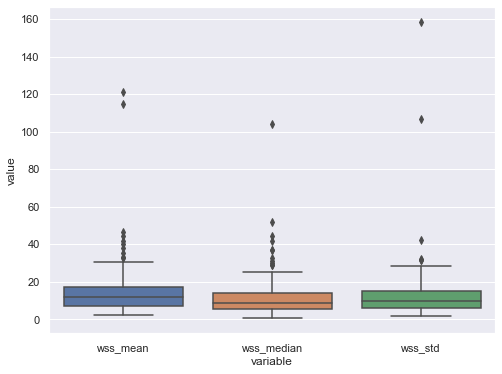

In [148]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,2:5]))

plt.show()

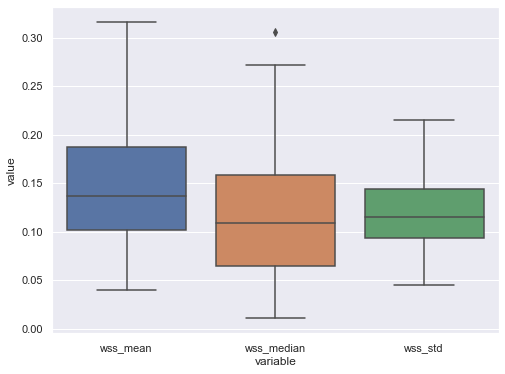

In [149]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda_scaled.iloc[:,2:5]))

plt.show()

In [150]:
wss_eda_scaled.query("wss_median >0.28").index.values

array(['4_BC'], dtype=object)

## 3.2 For Downsampled points

In [16]:
wss_columns = ['original_points','sampled_points','wss_mean','wss_median','wss_std','wss_min','wss_max',]

wss_eda = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_eda_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

if not wss_eda.empty and wss_eda_scaled.empty :
    del(wss_eda)
    del(wss_eda_scaled)
    

wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for PATIENT_ID in patient_id_list:

    
    df_wss= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df_wss["WSS_scaled"] = scale_data(df_wss["WSS"],min_max_scaler)
    
    
    wss_eda.loc[PATIENT_ID] = [np.nan, df_wss.shape[0] , 
                               np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), 
                               np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
    wss_eda_scaled.loc[PATIENT_ID] = [np.nan, df_wss.shape[0],
                                      np.mean(df_wss.WSS_scaled), np.median(df_wss.WSS_scaled), np.std(df_wss.WSS_scaled), 
                                      np.min(df_wss.WSS_scaled), np.max(df_wss.WSS_scaled)
                         ]
wss_eda = wss_eda.infer_objects()
wss_eda_scaled = wss_eda_scaled.infer_objects()

wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,15307,2.490443,2.128127,2.100096,0.000186,15.912992
3_BC,NaN,15271,7.490731,7.269658,4.003876,0.230612,24.304548


In [18]:
wss_eda_scaled

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,15307,0.156494,0.133725,0.131975,0.0,1.0
3_BC,NaN,15271,0.301576,0.292393,0.166316,0.0,1.0
4_BC,NaN,15223,0.297662,0.308472,0.121170,0.0,1.0
5_BM,NaN,15366,0.153726,0.109787,0.147996,0.0,1.0
6_BM,NaN,15154,0.188250,0.122121,0.174121,0.0,1.0
7_BP,NaN,15286,0.278710,0.276414,0.217949,0.0,1.0
8_BP,NaN,15376,0.149855,0.134655,0.118203,0.0,1.0
9_KBW,NaN,15393,0.278525,0.236972,0.175338,0.0,1.0
10_SUM,NaN,15155,0.206617,0.167265,0.176258,0.0,1.0
11_DHM,NaN,15304,0.111786,0.079899,0.105125,0.0,1.0


In [19]:
wss_eda

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,15307,2.490443,2.128127,2.100096,1.859100e-04,15.912992
3_BC,NaN,15271,7.490731,7.269658,4.003876,2.306118e-01,24.304548
4_BC,NaN,15223,7.241745,7.493473,2.821590,3.103154e-01,23.596545
5_BM,NaN,15366,11.081461,7.922747,10.639134,3.040470e-02,71.918332
6_BM,NaN,15154,6.392113,4.151279,5.900233,1.308063e-02,33.898992
7_BP,NaN,15286,26.543789,26.328581,20.427845,4.209901e-01,94.148431
8_BP,NaN,15376,19.556355,17.609672,15.138565,3.640326e-01,128.436470
9_KBW,NaN,15393,4.838335,4.143696,2.931132,1.822189e-01,16.899287
10_SUM,NaN,15155,6.684475,5.421281,5.657837,5.212654e-02,32.151853
11_DHM,NaN,15304,4.662536,3.336829,4.370509,1.507660e-02,41.589620


In [20]:
wss_eda_scaled.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,0.0,130.000000,130.000000,130.000000,130.000000,130.0,1.300000e+02
mean,NaN,15306.069231,0.190047,0.157871,0.153363,0.0,1.000000e+00
std,NaN,94.365871,0.058078,0.067940,0.033383,0.0,1.139947e-16
min,NaN,15112.000000,0.068602,0.020580,0.073624,0.0,1.000000e+00
50%,NaN,15301.000000,0.182438,0.146722,0.155938,0.0,1.000000e+00
55.6%,NaN,15311.666667,0.191745,0.158086,0.159269,0.0,1.000000e+00
61.1%,NaN,15321.833333,0.202242,0.170170,0.162230,0.0,1.000000e+00
66.7%,NaN,15330.000000,0.208324,0.181423,0.166447,0.0,1.000000e+00
72.2%,NaN,15344.166667,0.224995,0.190073,0.173622,0.0,1.000000e+00
77.8%,NaN,15359.333333,0.235077,0.195749,0.179417,0.0,1.000000e+00


In [21]:
wss_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,0.0,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,NaN,15306.069231,15.484795,12.569344,12.919276,2.845403e-01,85.027073
std,NaN,94.365871,16.519139,12.942150,15.880039,3.954968e-01,91.916721
min,NaN,15112.000000,2.490443,0.971145,1.862863,3.600000e-07,12.869083
50%,NaN,15301.000000,11.470729,9.078912,9.739205,1.498490e-01,63.049647
55.6%,NaN,15311.666667,13.474689,10.424875,10.606421,1.786965e-01,71.035970
61.1%,NaN,15321.833333,14.461040,12.070704,11.305313,2.009105e-01,77.078504
66.7%,NaN,15330.000000,16.274585,12.672676,12.216474,2.430090e-01,81.927927
72.2%,NaN,15344.166667,16.846205,13.845857,12.899717,3.117013e-01,92.739621
77.8%,NaN,15359.333333,17.773873,15.199331,16.059558,3.679376e-01,104.818165


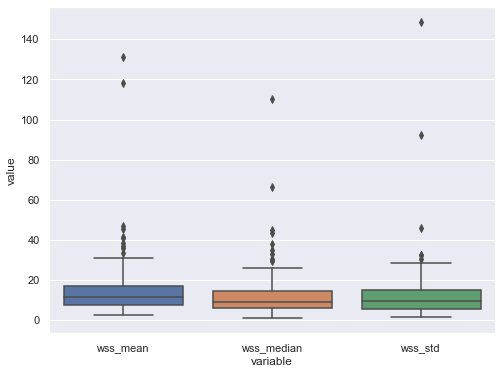

In [22]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,2:5]))

plt.show()

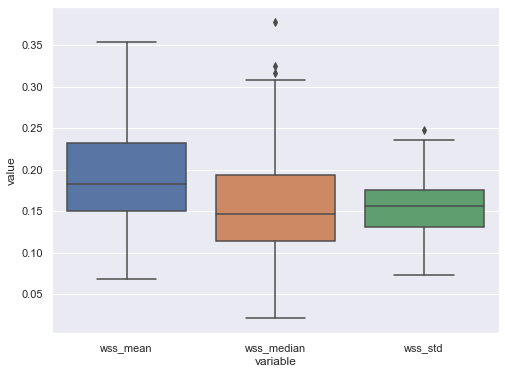

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda_scaled.iloc[:,2:5]))

plt.show()

In [24]:
wss_eda_scaled.query("wss_median >0.31").index.values

array(['27_HM', '46_LE', '124_VA'], dtype=object)

In [25]:
wss_eda_scaled.query("wss_std >0.24").index.values

array(['23_HJ'], dtype=object)

# 4. Curvature

## 4.1 Mean

In [11]:
def scale_data(col: pd.Series,scaler) -> pd.Series:
    """
    Scale a column
    """
    X = col.values.reshape(-1, 1).copy()
    scaled_array = scaler.fit_transform(X)

    scaled_column = pd.Series(scaled_array.tolist()).explode()

    return scaled_column

In [17]:
curv_columns = ['original_points','sampled_points','mean','median','std','min','max',]

curv_eda = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled = pd.DataFrame(index=patient_id_list, columns = curv_columns )

if not curv_eda.empty and curv_eda_scaled.empty :
    del(curv_eda)
    del(curv_eda_scaled)
    

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for PATIENT_ID in patient_id_list:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df["curv_scaled"] = scale_data(df["mean_curv"],min_max_scaler)
    
    
    curv_eda.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.mean_curv), np.median(df.mean_curv), np.std(df.mean_curv), 
                               np.min(df.mean_curv), np.max(df.mean_curv)
                         ]
    curv_eda_scaled.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
                                      np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
                                      np.min(df.curv_scaled), np.max(df.curv_scaled)
                         ]
curv_eda = curv_eda.infer_objects()
curv_eda_scaled = curv_eda_scaled.infer_objects()

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127,15307,0.589970,0.591073,0.068284,0.0,1.0
3_BC,28274,15271,0.476797,0.477805,0.081036,0.0,1.0


In [19]:
curv_eda

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127,15307,0.000061,0.000062,0.000061,-0.000462,0.000425
3_BC,28274,15271,0.000062,0.000063,0.000056,-0.000265,0.000421
4_BC,22604,15223,0.000070,0.000072,0.000056,-0.000303,0.000345
5_BM,95358,15366,0.000046,0.000046,0.000076,-0.000549,0.000628
6_BM,20744,15154,0.000087,0.000087,0.000073,-0.000315,0.000574
7_BP,68120,15286,0.000092,0.000094,0.000083,-0.000313,0.000397
8_BP,88042,15376,0.000078,0.000085,0.000069,-0.000334,0.000373
9_KBW,79622,15393,0.000073,0.000075,0.000076,-0.000351,0.000389
10_SUM,70856,15155,0.000075,0.000080,0.000060,-0.000212,0.000328
11_DHM,76754,15304,0.000072,0.000072,0.000074,-0.000360,0.000414


In [20]:
curv_eda_scaled

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127,15307,0.589970,0.591073,0.068284,0.0,1.0
3_BC,28274,15271,0.476797,0.477805,0.081036,0.0,1.0
4_BC,22604,15223,0.575635,0.578826,0.086398,0.0,1.0
5_BM,95358,15366,0.505492,0.505059,0.064784,0.0,1.0
6_BM,20744,15154,0.451870,0.452509,0.081998,0.0,1.0
7_BP,68120,15286,0.571284,0.572956,0.116676,0.0,1.0
8_BP,88042,15376,0.582394,0.593055,0.097186,0.0,1.0
9_KBW,79622,15393,0.573034,0.575885,0.102418,0.0,1.0
10_SUM,70856,15155,0.529960,0.539921,0.111784,0.0,1.0
11_DHM,76754,15304,0.558297,0.558213,0.096058,0.0,1.0


In [21]:
curv_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,66639.869231,15306.069231,0.000075,0.000076,0.000071,-0.000346,0.000400
std,22043.015602,94.365871,0.000018,0.000018,0.000013,0.000119,0.000106
min,20744.000000,15112.000000,0.000040,0.000043,0.000043,-0.000897,0.000227
50%,65068.500000,15301.000000,0.000073,0.000075,0.000070,-0.000328,0.000391
55.6%,70595.000000,15311.666667,0.000076,0.000077,0.000071,-0.000315,0.000400
61.1%,74080.000000,15321.833333,0.000079,0.000078,0.000073,-0.000307,0.000413
66.7%,76040.000000,15330.000000,0.000083,0.000083,0.000075,-0.000299,0.000426
72.2%,77868.333333,15344.166667,0.000087,0.000086,0.000076,-0.000279,0.000434
77.8%,80976.000000,15359.333333,0.000090,0.000090,0.000078,-0.000258,0.000452


In [22]:
curv_eda_scaled.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,1.300000e+02
mean,66639.869231,15306.069231,0.565318,0.566294,0.097913,0.0,1.000000e+00
std,22043.015602,94.365871,0.082179,0.085027,0.015264,0.0,6.182233e-17
min,20744.000000,15112.000000,0.320885,0.312733,0.053099,0.0,1.000000e+00
50%,65068.500000,15301.000000,0.573856,0.576357,0.098192,0.0,1.000000e+00
55.6%,70595.000000,15311.666667,0.579185,0.582381,0.101232,0.0,1.000000e+00
61.1%,74080.000000,15321.833333,0.587060,0.591059,0.103114,0.0,1.000000e+00
66.7%,76040.000000,15330.000000,0.596875,0.599938,0.105095,0.0,1.000000e+00
72.2%,77868.333333,15344.166667,0.617014,0.617872,0.109107,0.0,1.000000e+00
77.8%,80976.000000,15359.333333,0.627357,0.625094,0.110584,0.0,1.000000e+00


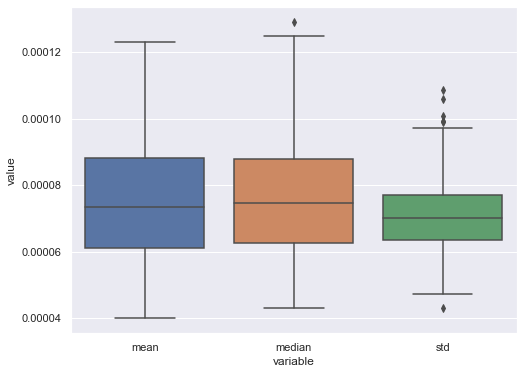

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(curv_eda.iloc[:,2:5]))

plt.show()

In [32]:
curv_eda.query("median > 0.000125").index.values

array(['48_LE'], dtype=object)

In [38]:
curv_eda.query("std > 0.00009").index.values

array(['18_EM', '21_FA', '29_JM', '39_KBB', '61_BN', '63_CA', '64_CA',
       '66_GI', '69_HI', '71_HRA', '76_JM', '90_BMW', '109_SG', '110_SK'],
      dtype=object)

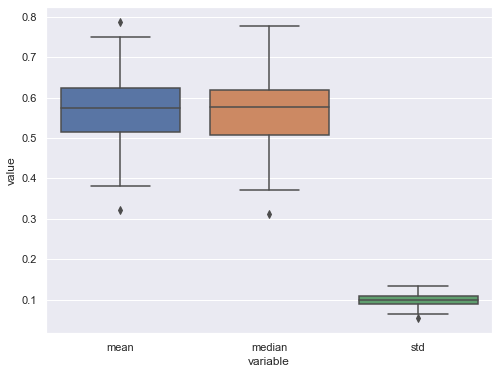

In [24]:
sns.boxplot(x="variable", y="value", data=pd.melt(curv_eda_scaled.iloc[:,2:5]))

plt.show()

In [26]:
curv_eda_scaled.query("median <0.38").index.values

array(['101_MR', '130_ZK'], dtype=object)

## Fill (FPFH, SHOT) NA Values and PCA Compute

In [39]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
#     print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))
    return hours,minutes,seconds

In [40]:
from sklearn.decomposition import PCA


In [47]:
pca_columns =  ['C1','C2','C3','C4','C5','C6','C7','C8','C9']
pca_fpfh_df = pd.DataFrame(index=patient_id_list, columns = pca_columns )
pca_shot_main_df = pd.DataFrame(index=patient_id_list, columns = pca_columns )
pca_shot_rf_df = pd.DataFrame(index=patient_id_list, columns = pca_columns )

if not pca_fpfh_df.empty:
    print(True)
#     del (pca_fpfh_df)
#     del (pca_shot_main_df)
#     del (pca_shot_rf_df)

pca_fpfh_df.head()

True


,C1,C2,C3,C4,C5,C6,C7,C8,C9
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# RADIUS_SEARCH = 0.00024
# RADIUS = RADIUS_SEARCH * 0.6
PCA_N_COMPONENTS = 9

for PATIENT_ID in patient_id_list:
    fullstart = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    ############-------------------#############
    ############ Local Descriptors #############
    ############-------------------#############
    
    start = time.time()
    print("--------------> Starting Local descriptor computation")
    
    pcl_pc_obj = pclpy.pcl.PointCloud.PointXYZ()

    #Store in pcl_pc_obj
    pc = pcl.io.loadPLYFile(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"), cloud = pcl_pc_obj )


    data_normals = pcl_pc_obj.compute_normals(radius=RADIUS, num_threads=8)

    fpfh = pcl.features.FPFHEstimation.PointXYZ_Normal_FPFHSignature33()
    fpfh.setInputCloud(cloud = pcl_pc_obj)
    fpfh.setInputNormals(data_normals)
    fpfh.setRadiusSearch(RADIUS_SEARCH)


    fpfh_desc = pcl.PointCloud.FPFHSignature33()
    fpfh.compute(fpfh_desc)

    shot = pcl.features.SHOTEstimation.PointXYZ_Normal_SHOT352_ReferenceFrame()
    shot.setInputCloud(cloud = pcl_pc_obj)
    shot.setInputNormals(data_normals)
    shot.setRadiusSearch(RADIUS_SEARCH)

    shot_desc = pcl.PointCloud.SHOT352()
    shot.compute(shot_desc)
    
    fp    = np.nan_to_num(fpfh_desc.histogram)
    sh_main = np.nan_to_num(shot_desc.descriptor)
    sh_rf = np.nan_to_num(shot_desc.rf)

    pca = PCA(n_components= PCA_N_COMPONENTS)
    
    pca.fit(fp)
    pca_fpfh_df.loc[PATIENT_ID] = pca.explained_variance_ratio_
    pca.transform(fp)
    
    pca.fit(sh_main)
    pca_shot_main_df.loc[PATIENT_ID] = pca.explained_variance_ratio_
    pca.transform(sh_main)
    
    pca.fit(sh_rf)
    pca_shot_rf_df.loc[PATIENT_ID] = pca.explained_variance_ratio_
    pca.transform(sh_rf)
    
    end = time.time()
      #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished computing Local descriptors in {hours} hrs {minutes} mins {round(seconds)} secs")



Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\2_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 3 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\3_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\4_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\5_BM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspac

Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\38_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\39_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\40_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\41_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 2
Finish

Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 1 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\71_HRA_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\72_HRA_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\73_HS_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 1 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\74_HS_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished

Total seconds = 2
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\105_RS_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 1 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\106_RU_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\107_SA_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finished computing Local descriptors in 0.0 hrs 0.0 mins 2 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\108_SB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 1
Finish

In [51]:
pca_fpfh_df = pca_fpfh_df.infer_objects()
pca_shot_main_df = pca_shot_main_df.infer_objects()
pca_shot_rf_df = pca_shot_rf_df.infer_objects()


In [52]:
pca_fpfh_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.624707,0.111012,0.050274,0.033300,0.023750,0.015426,0.012529,0.011057,0.009965
std,0.186302,0.060183,0.032703,0.021237,0.012783,0.007149,0.006395,0.006023,0.005642
min,0.318370,0.031952,0.010303,0.004948,0.002241,0.002041,0.001896,0.001529,0.001270
25%,0.440009,0.054335,0.024686,0.015602,0.012912,0.009426,0.007057,0.005900,0.005047
50%,0.651199,0.105450,0.042732,0.029643,0.021223,0.014710,0.011416,0.009848,0.009097
75%,0.798329,0.156881,0.071381,0.046186,0.033786,0.020679,0.017572,0.015358,0.014785
max,0.926586,0.252998,0.184366,0.119237,0.050935,0.034666,0.027052,0.023715,0.022161


In [53]:
pca_shot_main_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.127809,0.034609,0.026439,0.023706,0.021611,0.020381,0.019236,0.018235,0.017249
std,0.090405,0.012803,0.007909,0.007627,0.005611,0.005549,0.004844,0.004645,0.003994
min,0.031205,0.023124,0.018496,0.014282,0.013812,0.013183,0.012952,0.012729,0.012347
25%,0.064104,0.028462,0.021643,0.019314,0.018364,0.016824,0.016288,0.015469,0.014754
50%,0.101194,0.031001,0.023313,0.020895,0.019745,0.018545,0.017895,0.016499,0.016028
75%,0.143013,0.035345,0.026423,0.024453,0.022347,0.021633,0.019351,0.018660,0.017771
max,0.445576,0.121622,0.053998,0.050144,0.038696,0.036605,0.034276,0.032309,0.029777


In [54]:
pca_shot_rf_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.139084,0.130170,0.126195,0.117848,0.110449,0.105863,0.096853,0.093364,0.080173
std,0.009026,0.005903,0.005300,0.004551,0.003090,0.003004,0.004584,0.005086,0.011439
min,0.119930,0.119093,0.114971,0.110751,0.102208,0.097167,0.082949,0.077758,0.050487
25%,0.132364,0.126105,0.122309,0.114345,0.108632,0.103809,0.094087,0.089952,0.073108
50%,0.138030,0.129528,0.126408,0.116591,0.110806,0.106216,0.097269,0.093999,0.080723
75%,0.145575,0.133870,0.129714,0.120920,0.112141,0.107983,0.099928,0.096823,0.088290
max,0.170273,0.144256,0.140381,0.134126,0.118725,0.113591,0.107055,0.103401,0.101352


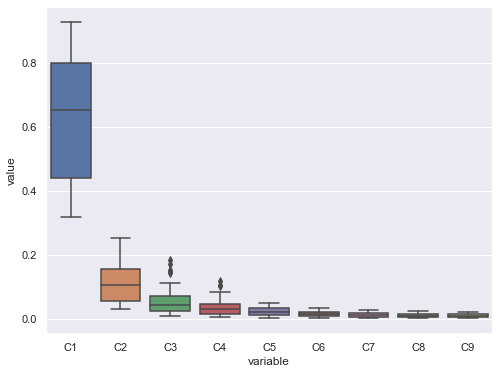

In [55]:
sns.boxplot(x="variable", y="value", data=pd.melt(pca_fpfh_df))

plt.show()

In [69]:
pca_fpfh_df.query("C1 < 0.42").shape

(30, 9)

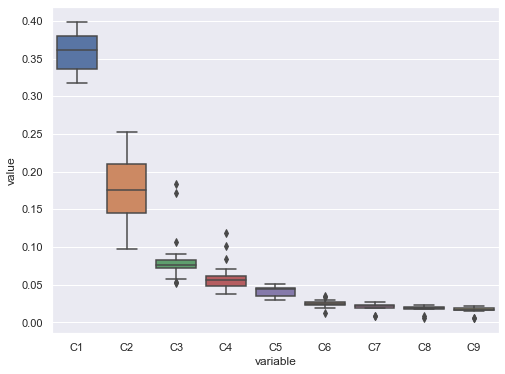

In [67]:
sns.boxplot(x="variable", y="value", data=pd.melt(pca_fpfh_df.query("C1 < 0.4")))

plt.show()

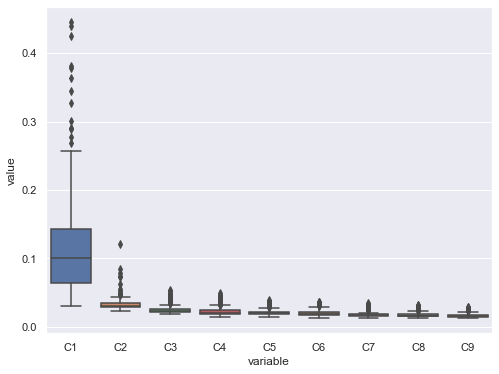

In [56]:
sns.boxplot(x="variable", y="value", data=pd.melt(pca_shot_main_df))

plt.show()

In [58]:
pca_shot_main_df.query("C1 > 0.26").index.values

array(['6_BM', '33_KBB', '35_KBB', '38_KBB', '42_KBB', '56_WA', '79_KBB',
       '80_KBB', '82_KBB', '83_KBB', '93_MAS', '95_MAS', '96_MAS'],
      dtype=object)

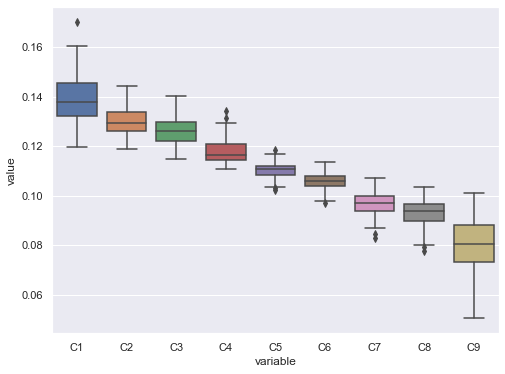

In [57]:
sns.boxplot(x="variable", y="value", data=pd.melt(pca_shot_rf_df))

plt.show()

### Observations
1. SHOT has very less variance explained for 1st 3 components
2. SHOT has a lot of outliers in C1. Basically they have better structures for SHOT as they explain more
3. For FPFH, 61 files have C1 lower than Q3 value. This causes less variance explanation for 50% files for FPFH
4. For 30 files, FPFH has <0.42 (Q2) and still has similar C2 feature variance compared to whole dataset. This means that 25% files have very low variance explained with 1st 3 components in FPFH. 

In [150]:
#Read Downsampled point cloud
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}_{PYMESH_FILENAME}"))

#Build tree for original point cloud
o3d_kdtree = o3d.geometry.KDTreeFlann(pc_o3d)

# Radius search 
RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)

search_pt_min = pc_o3d.points[np.argmin(np.array(NN_dist))]
search_pt_max = pc_o3d.points[np.argmax(np.array(NN_dist))]

[k_min, idx_min, _] = o3d_kdtree.search_radius_vector_3d(search_pt_min, RADIUS_SEARCH)
[k_max, idx_max, _] = o3d_kdtree.search_radius_vector_3d(search_pt_max, RADIUS_SEARCH)

print(f"\nTotal neighbourhood points for the point with: \nmin dist = {k_min} \nmax dist = {k_max}")


Total neighbourhood points for the point with: 
min dist = 8 
max dist = 4


In [197]:
np.array(pc_o3d.points)[idx_max]

array([[ 0.02120341, -0.00085545, -0.02338964],
       [ 0.02135746, -0.00092897, -0.02336138],
       [ 0.02107149, -0.00089891, -0.02350854],
       [ 0.02124992, -0.00101906, -0.02346549]])

In [182]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', 'i4')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = 123
a['label'][0] = 123
a['label'][1] = 126
a['label'][2] = 129
a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [176]:
v.data.dtype.fields

mappingproxy({'x': (dtype('float32'), 0),
              'y': (dtype('float32'), 4),
              'z': (dtype('float32'), 8),
              'label': (dtype('int32'), 12)})

In [194]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', '|O')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
# a['label'][0] = 123
# a['label'][1] = 126
# a['label'][2] = 129
# a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [192]:
np.array([1,2,19])

array([ 1,  2, 19])

In [181]:
a

array([(0., 0., 0., 123), (0., 1., 1., 126), (1., 0., 1., 129),
       (1., 1., 0., 121)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', '<i4')])

In [168]:
v.data.dtype.descr + [('label', 'i4')]

[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', 'i4')]

In [188]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"test_fpfh.ply"))
v = p.elements[0]

In [189]:
p.elements[0].data.dtype.descr

[('fpfh', '|O')]

In [183]:
a['label']

array([123, 126, 129, 121])

In [190]:
p.elements[0].data

array([(array([84.14448  ,  0.       ,  0.       ,  0.       ,  2.3670673,
       13.488455 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       , 84.14448  ,  0.       ,  0.       ,  2.3670673,
        8.992304 ,  0.       ,  0.       ,  2.1290843,  2.3670673,
        0.       ,  0.       , 68.52694  ,  0.       ,  0.       ,
        0.       ,  2.3670673, 13.488455 ,  8.516337 ,  7.1012025,
        0.       ,  0.       ,  0.       ], dtype=float32),),
       (array([100.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       , 100.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,  86.40641  ,   0.       ,   0.       ,
         0.       ,   3.3983986,   6.7967973,   3.3983986,   0.       ,
         0.       ,   0.       ,   0.       ], dtype=float32),),
       (array([100.,   